# Preparing Time Series from Wide-Form Data

## Task

### Part 1

- First, you will prepare the dataset for time series analysis:
  - Load in the Zillow Home Value Index dataframe.
   - Note: it is a large file and may take a minute to load.
- Filter the 4 largest cities into a new dataframe.
  - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
   - Therefore the 4 largest cities would have rank values of [0,1,2,3]
- Melt the data to long-form and prepare it for time series analysis.
 - Convert the melted dates into datetime datatype.
 - Make the datetime column the index.
- Resample the dataframe as monthly frequency, grouped by City.



---

### Part 2

- Once you've prepared the dataframe with the time series data for the 4 largest cities:
  - Plot the home values for all 4 cities. (Hint: use unstack)
   - Make sure to add a title and axis labels.
   - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
     - Hint: use the FuncFormatter from matplotlib.

- Answer the following 2 questions using pandas:
  
 - 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
   - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 

 - 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
   - Hint: you can use .diff() to calculate the change in values

---

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

In [38]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [39]:
df_city = df.copy()
df_city

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [40]:
id_vars = df_city.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [41]:
date = pd.melt(df_city, id_vars, var_name ='Date', value_name='Value')
date

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,2000-01-31,114794.0
...,...,...,...,...,...,...,...,...,...,...
6133486,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,2022-09-30,192110.0
6133487,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,2022-09-30,264685.0
6133488,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,2022-09-30,142438.0
6133489,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,2022-09-30,266255.0


In [42]:
date= date.drop(columns='StateName')
date

,RegionID,SizeRank,RegionName,RegionType,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6915,4,San Antonio,city,TX,"San Antonio-New Braunfels, TX",Bexar County,2000-01-31,114794.0
...,...,...,...,...,...,...,...,...,...
6133486,236350,28439,Palisades,city,TX,"Amarillo, TX",Randall County,2022-09-30,192110.0
6133487,40403,28439,Port Mansfield,city,TX,"Raymondville, TX",Willacy County,2022-09-30,264685.0
6133488,54740,28439,Tribes Hill,city,NY,"Amsterdam, NY",Montgomery County,2022-09-30,142438.0
6133489,249186,28439,Derby Center,city,VT,NaN,Orleans County,2022-09-30,266255.0


- Filter the 4 largest cities into a new dataframe.


In [57]:
df_new = date.loc[(date['SizeRank'][0:4])]
df_new

,RegionID,SizeRank,RegionName,RegionType,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0


- Convert the melted dates into datetime datatype. 

In [58]:
df_new['Date'][0]

'2000-01-31'

In [60]:
import datetime
today_datetime = datetime.datetime.today()

fmt = "%Y-%m-%d"
today_datetime.strftime(fmt)

'2023-09-29'

In [61]:
df_new['Date'] = pd.to_datetime(df_new['Date'],format=fmt)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    4 non-null      int64         
 1   SizeRank    4 non-null      int64         
 2   RegionName  4 non-null      object        
 3   RegionType  4 non-null      object        
 4   State       4 non-null      object        
 5   Metro       4 non-null      object        
 6   CountyName  4 non-null      object        
 7   Date        4 non-null      datetime64[ns]
 8   Value       4 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 492.0+ bytes


- Make the datetime column the index.

In [85]:
df_new = df_new.set_index('Date')
df_new

KeyError: "None of ['Date'] are in the columns"

In [63]:
df_new.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31'], dtype='datetime64[ns]', name='Date', freq=None)

- Resample the dataframe as monthly frequency, grouped by City.

In [76]:
df_ts = df_new.groupby('RegionType').resample("M").last()['Value']
df_ts

RegionType  Date      
city        2000-01-31    166139.0
Name: Value, dtype: float64

In [77]:
type(df_ts)

pandas.core.series.Series

### Part 2

In [82]:
df_unstacked = df_ts.unstack(0)
df_unstacked

RegionType,city
Date,
2000-01-31,166139.0


C:\Users\valma\anaconda3\envs\dojo-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


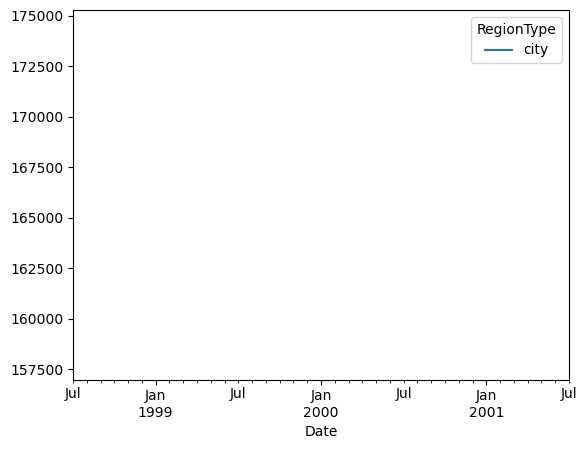

In [84]:
df_unstacked.plot();